### 표준 라이브러리 로딩

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고무시
import warnings
warnings.filterwarnings('ignore')

### MovieLens 데이터셋 정보
- https://grouplens.org/datasets.movielens
#### rating
- user_id
- movie_id
- rating
- time
#### movie
- movie_id
- title
- genre
#### user
- user_id
- gender
- age
- occuption(개인정보-직업)
- zipcode(개인정보-주소)
#### Etc
- 각 데이터는 '::' 구분자를 사용하여 열을 구문하였다.

### 데이터 로딩

In [2]:
rating_data = pd.io.parsers.read_csv('D:/DataScience/data/ratings.dat',
                                    names = ['user_id', 'movie_id','rating','time'],
                                    delimiter='::')
movie_data = pd.io.parsers.read_csv('D:/DataScience/data/movies.dat',
                                    names = ['movie_id','title','genre'],
                                    delimiter='::')
user_data = pd.io.parsers.read_csv('D:/DataScience/data/users.dat',
                                    names = ['user_id', 'gender','age','occupation', 'zipcode'],
                                    delimiter='::')

In [3]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
time        1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [7]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipcode       6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [8]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genre       3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [9]:
rating_data.isnull().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [10]:
movie_data.isnull().sum()

movie_id    0
title       0
genre       0
dtype: int64

In [11]:
user_data.isnull().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

### 탐색적 데이터 분석

In [12]:
# 총 영화의 개수
len(movie_data['movie_id'].unique())

3883

In [13]:
# 연도별 영화의 개수를 이용해서 가장 많은 영화가 출시된 년도 Top 10
# len(movie_data['title'][-5:-1])
movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1])
# 개별요소의 건수 value_counts()
movie_data['year'].value_counts().head(10)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [14]:
# 연대별 영화의 개수 추출
# 1900, 1910, 1920....
# 파생변수 : movie_term
movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+'0')
movie_year_term = movie_data['year_term'].value_counts().sort_index()
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64

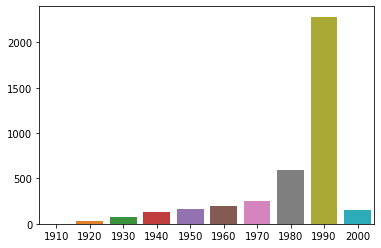

In [15]:
sns.barplot(movie_year_term.index, movie_year_term.values)
plt.show()

In [16]:
# 영화데이터에서 가장 많이 등장하는 장르는 무엇일까?
# 코미디|드라마|액션 => 구분자
# dict => key:value
unique_genre_dict = {}

for index, row in movie_data.iterrows():
    # genre 피처의 구분자를 분리
    genre_combination = row['genre']
    p = genre_combination.split('|')
    
    for genre in p:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
            
unique_genre_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

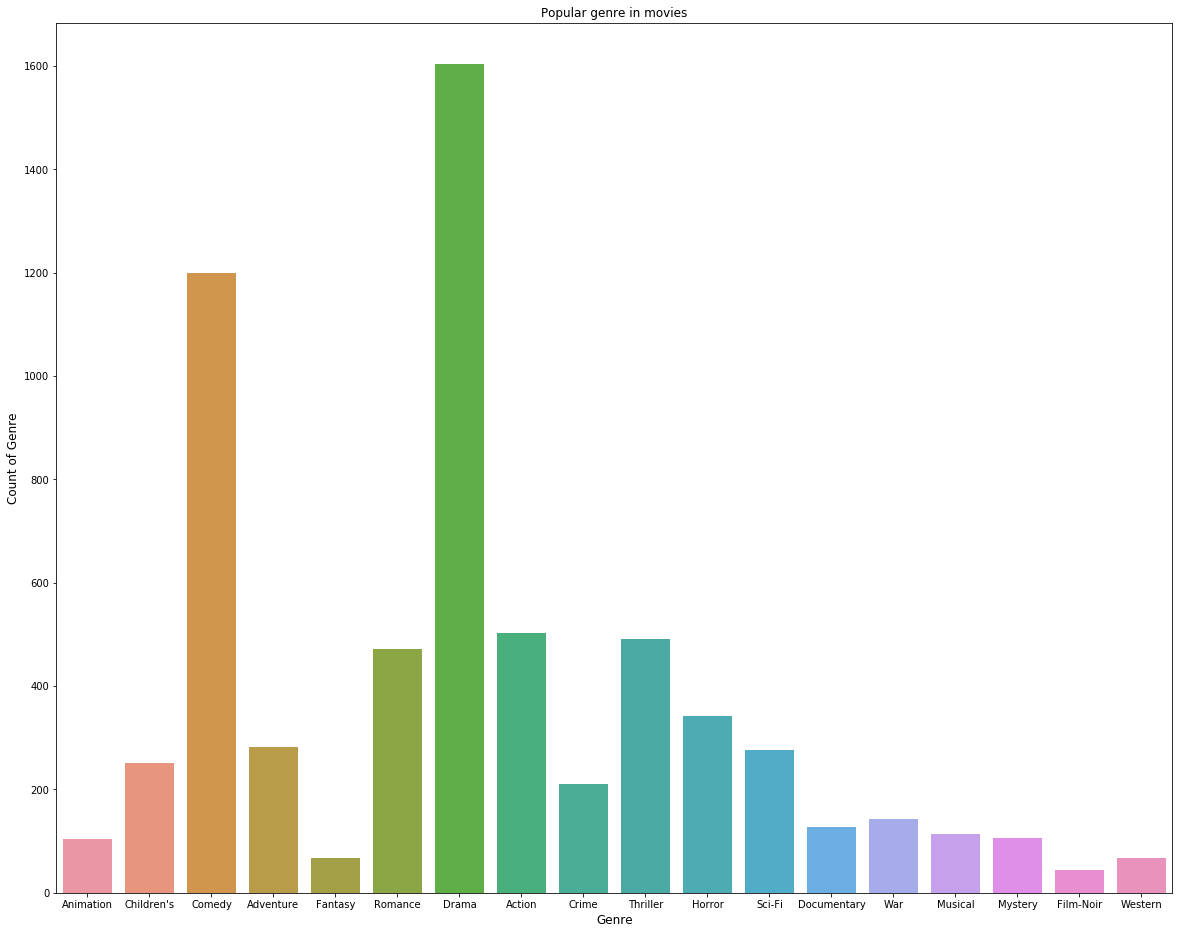

In [17]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), 
            list(unique_genre_dict.values()))

plt.title('Popular genre in movies')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count of Genre', fontsize=12)
plt.show()

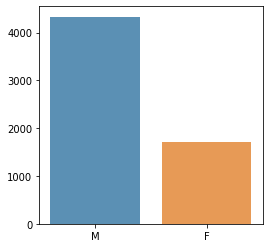

In [18]:
# 사용자의 성별과 사용자의 연령대
plt.rcParams['figure.figsize'] =[4,4]
user_gender = user_data['gender'].value_counts()
#user_gender
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.show()

In [ ]:
#plt.rcParams['figure.figsize'] =[4,4]
user_ages = user_data['age'].value_counts()
#user_gender
#sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
#plt.show()
user_ages

In [19]:
# user의 나이를 연령대로 묶는 작업
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0]+'0'
    
user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))

user_ages = user_data['ages'].value_counts()
user_ages

20         2096
30         1193
10         1103
50          876
40          550
outlier     222
Name: ages, dtype: int64

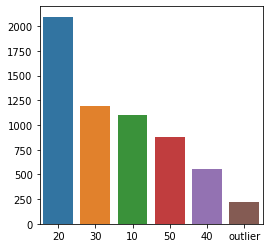

In [20]:
sns.barplot(user_ages.index, user_ages.values)
plt.show()

In [21]:
# 사용자의 수
len(user_data['user_id'].unique())

6040

In [22]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
time        1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [23]:
# 각 영화의 평점횟수
movie_rate_count = rating_data.groupby('movie_id')['rating'].count()
movie_rate_count

movie_id
1       2077
2        701
3        478
4        170
5        296
6        940
7        458
8         68
9        102
10       888
11      1033
12       160
13        99
14       153
15       146
16       682
17       835
18       157
19       389
20       160
21      1356
22       378
23       126
24       624
25       980
26       100
27        61
28       179
29       403
30        74
        ... 
3923     104
3924      26
3925     124
3926     180
3927     348
3928     206
3929     147
3930     223
3931      27
3932     232
3933      16
3934      28
3935      23
3936     112
3937     135
3938      27
3939      26
3940      15
3941      22
3942      28
3943      96
3944       9
3945      43
3946     100
3947      55
3948     862
3949     304
3950      54
3951      40
3952     388
Name: rating, Length: 3706, dtype: int64

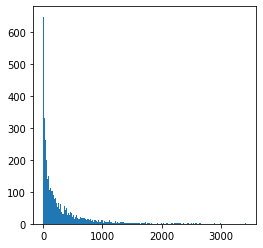

In [24]:
fig = plt.hist(movie_rate_count.values, bins = 200)
plt.show()

In [25]:
print('총 영화수 : ', len(movie_data['movie_id'].unique()))

총 영화수 :  3883


In [26]:
print('100개 미만의 평가를 받은 영화수 : ',
      len(movie_rate_count[movie_rate_count < 100]))

100개 미만의 평가를 받은 영화수 :  1687


In [27]:
# 각 영화의 평균평점을 추출
# 각 영화당 평점건수와 평균값을 추출시오.
movie_groupby_rating_info = rating_data.groupby('movie_id')['rating'].agg(
    {'rated_count':'count', 'rated_mean':'mean'})

movie_groupby_rating_info

,rated_count,rated_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
6,940,3.878723
7,458,3.410480
8,68,3.014706
9,102,2.656863


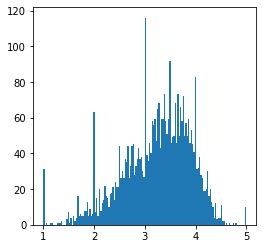

In [28]:
movie_groupby_rating_info['rated_mean'].hist(bins=150,grid=False)

In [29]:
# 유저별로 평가한 영화 개수
user_grouped_rating_info = rating_data.groupby(
    'user_id')['rating'].agg(['count', 'mean', 'std'])
user_grouped_rating_info.columns = ['rating_count', 
                                    'rating_mean',
                                   'rating_std']
user_grouped_rating_info.head()

,rating_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


In [ ]:
# 유저별로 평가한 평균 영화의 평점

In [ ]:
# 유저별로 평가한 영화 점수의 편차 

In [30]:
# 100번 이상 평가 받은 영화중 평점이 높은 Top 10의 영화 출력
merged_data = movie_groupby_rating_info.merge(movie_data,
                                             on=['movie_id'],
                                             how='left')
merged_data.head()

,movie_id,rated_count,rated_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990


In [31]:
# nlargest(n, 값_피처) : 가장 큰 값을 n번째까지 구해주는 함수
merged_data[merged_data[
    'rated_count'] > 100][['rated_mean','title']].nlargest(10, 'rated_mean')

,rated_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


### 영화 평점 예측 - 추천시스템 알고리즘
- 이미지, 영상 인식
- 소리 인식
- 사기방지
- 이상감지
- 침입탐지
- 환자진단
- 재고 최적화
- 수요 예측
- 추천시스템 : CF, CB, KB

In [32]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [33]:
rating_table = rating_data[['user_id', 
                            'movie_id', 'rating']].set_index(['user_id','movie_id']).unstack()
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

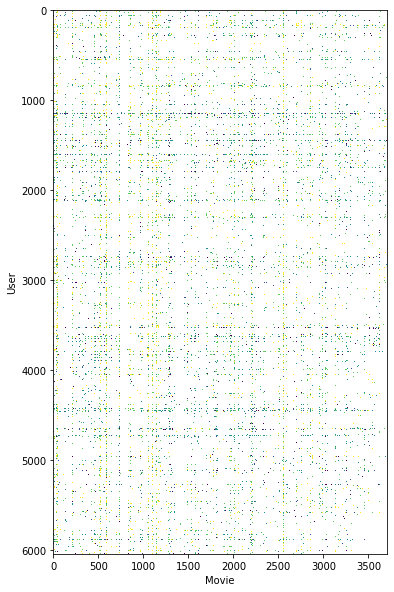

In [34]:
plt.rcParams['figure.figsize']=[10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel('Movie')
plt.ylabel('User')
plt.show()

### SVD를 활용한 추천시스템
- https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

In [35]:
# 빈칸을 포함한 user_item 행렬 생성
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# https://runebook.dev/ko/docs/numpy/reference/generated/numpy.set_printoptions
np.set_printoptions(suppress=True)  # 부동 소수점 숫자를 인쇄

reader = Reader(rating_scale=(1,5))

In [36]:
# 데이터프레임생성
ratings_dict = {'item_id':[1,2,3,1,2,3,2],
               'user_id':['a','a','a','b','b','b','c'],
               'rating':[2,4,4,2,5,4,5]}
df = pd.DataFrame(ratings_dict)
df

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [37]:
# 데이터 프레임을 행렬로 변환하여 확인
df_matrix_table = df[['user_id', 'item_id','rating']].set_index(['user_id','item_id']).unstack()
df_matrix_table

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          NaN  5.0  NaN

In [43]:
# SVD 사용을 위한 데이터셋을 생성
data = Dataset.load_from_df(df=df[['user_id', 'item_id', 'rating']],
                           reader=reader)
train_data = data.build_full_trainset()

In [44]:
model = SVD(n_factors = 8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=10)

model.fit(train_data)

In [45]:
# build_anti_testset()
# 학습에 사용된 matrix에 0으로 평가되어 있는 부분의 데이터
# user 혹은 item
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

for _, iid, _, predicted_rating, _ in predictions:
    print('Item id', iid, " : ", 'predicted rating : ', predicted_rating)

Item id 1  :  predicted rating :  3.6194878171953966
Item id 3  :  predicted rating :  3.800730969352729


In [ ]:
# fit-모델생성, 예측 : predict(), test()

In [46]:
# 학습데이터 
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 
                            'movie_id', 'rating']], reader)
train_data = data.build_full_trainset()

In [47]:
# SVD 모델 학습
import time
train_start = time.time()
model = SVD(n_factors = 8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=100)

model.fit(train_data)
train_end = time.time()
train_end-train_start

76.7209882736206

In [48]:
# 영화의 평점을 예측할 타겟이 되는 유저
target_user_id = 4
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [49]:
target_user_movie_rating_dict={}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id]=row['rating']
    
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [51]:
# 4번 유저가 보지 않은 영화의 정보를 테스트 데이터로 생성
test_data = []

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))

In [52]:
# 타겟 유저(4번)의 평정 점수를 예측
target_user_predictions = model.test(test_data)

In [53]:
# 예측된 점수 중에서 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict 


target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions, 
                                                           user_id = target_user_id, 
                                                           user_history = target_user_movie_rating_dict)
    

In [57]:
# target_user_movie_predict_dict 예측된 점수를 이용해서 타겟 유저에게 Top 10영화를 추천
import operator
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(),key=operator.itemgetter(1),reverse=True)[:10]

In [58]:
target_user_top10_predicted

[(106, 5),
 (213, 5),
 (326, 5),
 (527, 5),
 (615, 5),
 (750, 5),
 (858, 5),
 (898, 5),
 (899, 5),
 (904, 5)]

In [59]:
# 타이틀 정보를 포함해서 출력
movie_dict = {}

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title
    
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], " : ", predicted_rating)

Nobody Loves Me (Keiner liebt mich) (1994)  :  5
Burnt By the Sun (Utomlyonnye solntsem) (1994)  :  5
To Live (Huozhe) (1994)  :  5
Schindler's List (1993)  :  5
Bread and Chocolate (Pane e cioccolata) (1973)  :  5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)  :  5
Godfather, The (1972)  :  5
Philadelphia Story, The (1940)  :  5
Singin' in the Rain (1952)  :  5
Rear Window (1954)  :  5


### 예측 모델의 평가
- RMSE 

In [60]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 
                            'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델 학습
train_start = time.time()
model = SVD(n_factors = 8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=100)

model.fit(train_data)
train_end = time.time()
print('training time of model : %.2f second' % (train_end - train_start))

# 예측
predictions = model.test(test_data)

# 테스트 데이터의 RMSE 출력
print('RMSE of test dataset is SVD model :')
accuracy.rmse(predictions)

training time of model : 72.81 second
RMSE of test dataset is SVD model :
RMSE: 0.8589


0.8588984397899989

- RMSE 평가는 예측값과 실제값의 차이의 합을 나타내는 수치이기 때문에 작을 수록 좋은 모델을 뜻한다.

### 하이퍼파라미터 튜닝

In [61]:
rmse_list_by_factors = []
ttime_list_by_factors = []

for n in range(1, 15):
    train_start = time.time()
    model = SVD(n_factors = n,
               lr_all=0.005,
               reg_all=0.02,
               n_epochs=100)

    model.fit(train_data)
    train_end = time.time()
    print('training time of model : %.2f second' % (train_end - train_start))
    print('RMSE of test dataset in SVD model.n_factors = ' + str(n))
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end - train_start))
    print('--------------------------------------------')
    
print('searching n_factors is finish.')

training time of model : 58.03 second
RMSE of test dataset in SVD model.n_factors = 1
RMSE: 0.8818
--------------------------------------------
training time of model : 59.64 second
RMSE of test dataset in SVD model.n_factors = 2
RMSE: 0.8719
--------------------------------------------
training time of model : 61.08 second
RMSE of test dataset in SVD model.n_factors = 3
RMSE: 0.8678
--------------------------------------------
training time of model : 62.87 second
RMSE of test dataset in SVD model.n_factors = 4
RMSE: 0.8619
--------------------------------------------
training time of model : 64.69 second
RMSE of test dataset in SVD model.n_factors = 5
RMSE: 0.8588
--------------------------------------------
training time of model : 68.53 second
RMSE of test dataset in SVD model.n_factors = 6
RMSE: 0.8581
--------------------------------------------
training time of model : 70.07 second
RMSE of test dataset in SVD model.n_factors = 7
RMSE: 0.8609
-------------------------------------

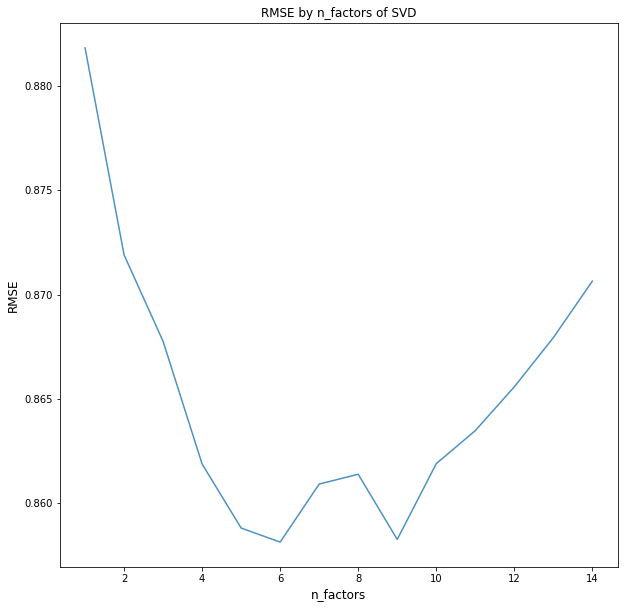

In [62]:
plt.plot(range(1, 15), rmse_list_by_factors, alpha=0.8)
plt.title('RMSE by n_factors of SVD')
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()

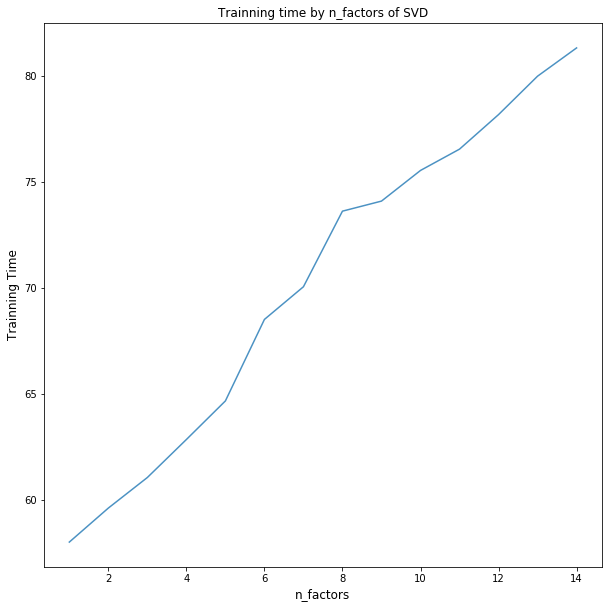

In [63]:
plt.plot(range(1, 15), ttime_list_by_factors, alpha=0.8)
plt.title('Trainning time by n_factors of SVD')
plt.ylabel('Trainning Time', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()